In [145]:
#Data Manipulation  
#=====================================
import pandas as pd 
import numpy as np 
#Train-Test Split 
#=====================================
from sklearn.model_selection import train_test_split
# Transformation 
#=====================================
from sklearn.preprocessing import StandardScaler
# Data Visualization 
#=====================================
import matplotlib.pyplot as plt 
import seaborn as sns
#Models
#=====================================
from keras.models import Sequential 
from keras.layers import Dense , Dropout 
from keras.callbacks import EarlyStopping 
#Accuracy 
#======================================
from sklearn.metrics import confusion_matrix, accuracy_score

In [146]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [147]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [148]:
X = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

In [149]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [150]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [151]:
### One Hot Encoding 
X=pd.get_dummies(X,sparse=True).astype(int)

In [152]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,1,1,0


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [154]:
### Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [155]:
X_train.shape

(8000, 13)

In [156]:
### Model 
ann=Sequential()
ann.add(Dense(units=11 ,activation='relu',input_shape=(13,)))
ann.add(Dense(units=6 ,activation='relu'))
#ann.add(Dense(units=32 ,activation='relu'))
ann.add(Dense(units=1 ,activation='sigmoid'))

c:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [157]:
ann.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 11)             │           154 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233 (932.00 B)

 Trainable params: 233 (932.00 B)

 Non-trainable params: 0 (0.00 B)

In [158]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### verbose=0 : Dont show any output during training 

In [159]:
es=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [160]:
history=ann.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,verbose=0,callbacks=[es])

In [161]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [162]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [163]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1547   60]
 [ 221  172]]


0.8595

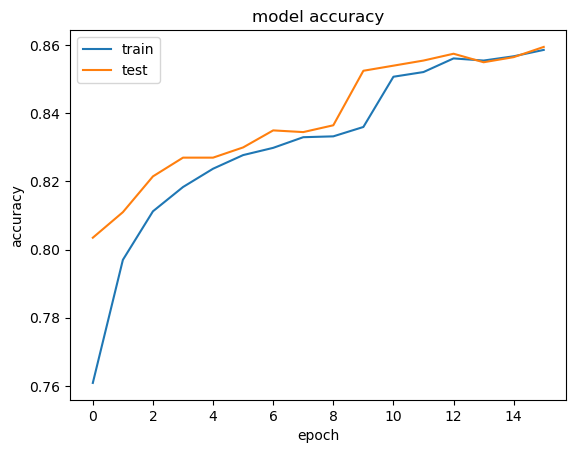

In [164]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

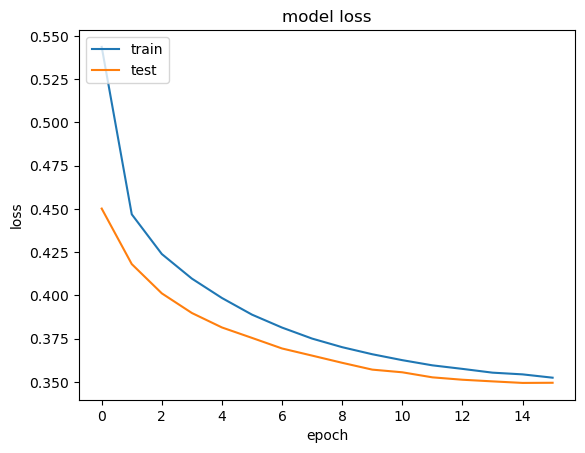

In [165]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## With Drop Out layer

In [166]:
### Model 
ann=Sequential()
ann.add(Dense(units=11 ,activation='relu',input_shape=(13,)))
ann.add(Dropout(0.2))
ann.add(Dense(units=6 ,activation='relu'))
ann.add(Dropout(0.2))
#ann.add(Dense(units=32 ,activation='relu'))
ann.add(Dense(units=1 ,activation='sigmoid'))

c:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [167]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [168]:
es=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [169]:
history=ann.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,verbose=0,callbacks=[es])

In [170]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [171]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [173]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1573   34]
 [ 259  134]]


0.8535

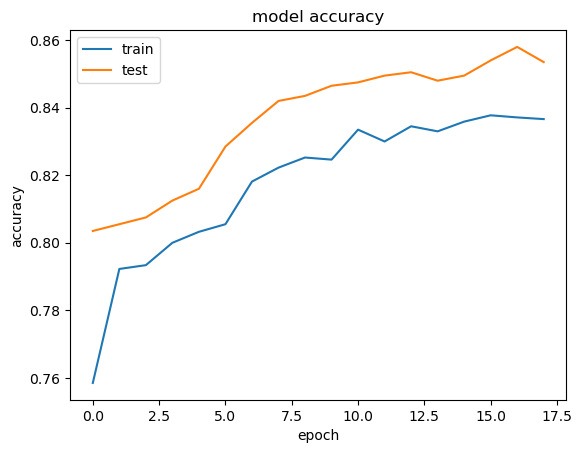

In [174]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

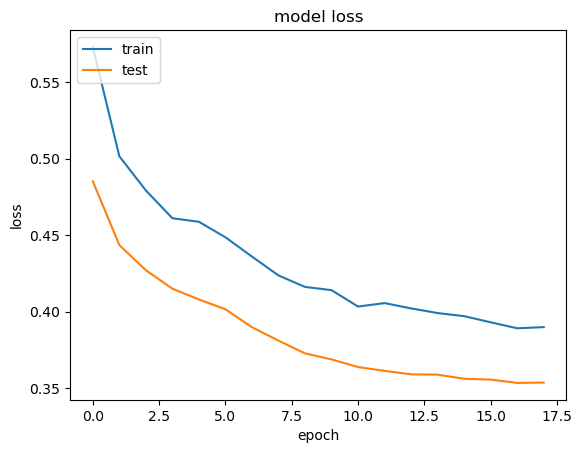

In [175]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()